# Problem Set 3

## Preparation

In [1]:
import pandas as pd
import numpy as np

### Import data

In [2]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
wdf = data602.read_weather()

# Question 1 -- Statistical data visualization (25 pts)
In the first assignment, problem 3, you identified an ``interesting'' pattern in the weather or citations dataset.  Recall that discovered knowledge should be novel, useful, and non-trivial.  Develop a explanatory visualization to present the knowledge you discovered.  (You may choose a different pattern from the one you used in the first homework assignment if you wish.)

In [4]:
cdf = data602.read_citations()

In [5]:
cdf.head()

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,000000091,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00
1,000000166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,,2011-12-09 12:39:00
2,000000299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00
3,000000315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,,2011-12-09 12:01:59
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00


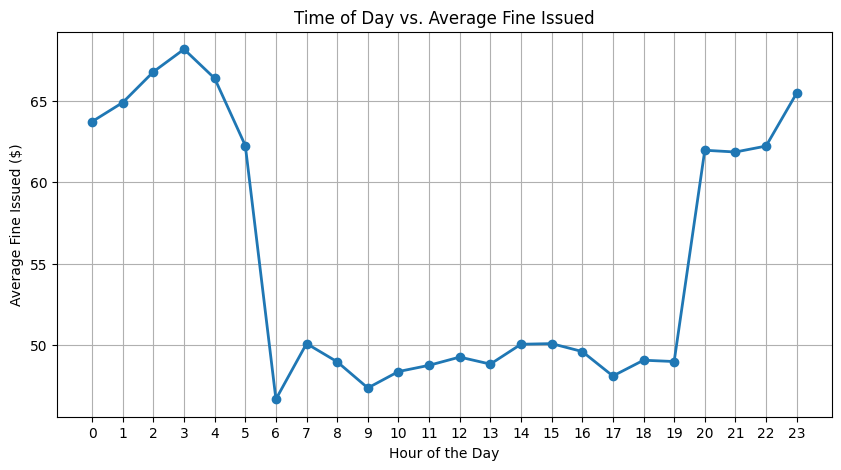

In [6]:

import matplotlib.pyplot as plt

# To Convert 'violdate' to datetime and extract the hour of the day
cdf['violdate'] = pd.to_datetime(cdf['violdate'])
cdf['hour'] = cdf['violdate'].dt.hour

# To compute the average fine for each hour of the day
hourly_fines = cdf.groupby('hour')['violfine'].mean()

# Ploting the results
plt.figure(figsize=(10, 5))
plt.plot(hourly_fines.index, hourly_fines.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fine Issued ($)')
plt.title('Time of Day vs. Average Fine Issued')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


The intresting pattern that I chose during my first assingment submission is on citations dataset.
**Recognized Trend:** Fines exhibit significant day-time variation, being high during the evening (beyond 7 PM till 4 AM), and low during the morning and day-time (6 AM through 6 PM).

**Singularity**:

discovery of this pattern helps in making potential changes in the level of enforcement, more monitoring at night (i.e., for overnight bans) and reduced enforcement during normal day-time operating times.

**Functionality:**

Policy Optimization: Agencies can adjust enforcement schedules, such as strengthening evening patrols or reassessing nighttime penalties.
Public Awareness: Drivers can plan parking to avoid high-penalty periods.

**Complexity:**

The study requires complex analysis of timestamp data, timestamp changes, and the use of visualizations beyond simple day-of-week averages.

**Conclusion:** This pattern introduces a distinctive and useful structure not shallow, delivering useful insights from complete time-dependent analysis rather than primitive statistical metrics.

# Question 2 -- Data preparation (75 pts)

This problem uses the weather dataset from previous problem sets.  Prepare a dataset to predict the observed temperature from the following predictors:

* The non-temperature fields from the observation
* The temperature recorded in the prior observation

Beginning with the weather dataset:

a. Replace missing values in the dataset with reasonable non-missing values.  Justify your strategy.

In [7]:
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0


In [8]:
# Handling missing values
wdf = wdf.copy()  # Avoid chained assignment warning

# Display missing values before handling them
print("Missing values before handling:")
print(wdf.isna().sum())


Missing values before handling:
date                  0
wnd_speed            13
tmp_meas              2
precip              110
precip_intensity      0
cloudcover           36
tstorm                0
winter                0
mist                  0
fog                   0
dtype: int64


wnd_speed, temp_meas , precip and cloudcover has missing values. lets handle these missing values carefully :

In [9]:

wdf['wnd_speed'] = wdf['wnd_speed'].fillna(wdf['wnd_speed'].median())  # as median handles outliers

wdf['tmp_meas'] = wdf['tmp_meas'].ffill()  # Forward filling for temperature (prior observation value), more logical

wdf['cloudcover'] = wdf['cloudcover'].fillna(wdf['cloudcover'].mode()[0])  # Mode imputation for categorical-like data "cloudcover"

wdf['precip'] = wdf['precip'].fillna(0.0)  # Assume missing precipitation means no precipitation.

# Display, to esure no mising values
print("Missing values after handling:")
print(wdf.isna().sum())



Missing values after handling:
date                0
wnd_speed           0
tmp_meas            0
precip              0
precip_intensity    0
cloudcover          0
tstorm              0
winter              0
mist                0
fog                 0
dtype: int64


*Justification for filling mised values of* **wind speed** :

I have selected median for wind speed as there is a possibility for outliers,
its better if median is used as it can handle sudden/ abropt changes in wind speed and fill the missing values properly.

*Justification for filling mised values of* **tmp_meas** :

I have assumed that temperature doesnt change rapidly, by looking at the wdf.head(). Since temperature is time dependent, forward filling is more logical.

*Justification for filling mised values of* **cloud cover**:

Cloud cover data is generally categorically (or semi-continuous, say, clear, partly cloudy, overcast). Using the mode (most common value) will make the value imputed the one seen the majority of the times.
This method also sidesteps distortions likely introduced by the use of averages, where the resulting value can differ from observed categorizations.

*Justification for filling mised values of* **precip**:

missing precipitation values basically means that "no measurable precipitation". therefore, filling those missed values with 0 makes more sense.


b. Add the temperature from the prior reading as a new feature.  That is, for each observation at time $t_k$, $k>0$, the new feature should have the value of the temperature reading at time $t_{k-1}$.  For the first observation ($k=0$), the value should be missing because the prior temperature is unknown.

In [10]:

# Creating the prior temperature feature
wdf['tmp_meas_previous'] = wdf['tmp_meas'].shift(1)

# Display processed dataset
from IPython.display import display

display(wdf)

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,tmp_meas_previous
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,NaN
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,7.2
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,6.1
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,6.7
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,6.1
...,...,...,...,...,...,...,...,...,...,...,...
67198,2023-09-01 15:54:00-04:00,1.5,26.7,0.0,0,1.0,0,0,0,0,26.1
67199,2023-09-01 16:54:00-04:00,4.6,26.7,0.0,0,1.0,0,0,0,0,26.7
67200,2023-09-01 17:54:00-04:00,3.6,26.1,0.0,0,1.0,0,0,0,0,26.7
67201,2023-09-01 18:54:00-04:00,3.6,24.4,0.0,0,1.0,0,0,0,0,26.1


c. Because the observed temperature is the target variable, it cannot be a feature.  Remove the observed temperature reading from the data frame, and save the values into a new array called $\mathbf{y}$

In [11]:
# Remove the observed temperature
y = wdf['tmp_meas'].values  # to Store observed temperature in y
wdf.drop(columns=['tmp_meas'], inplace=True)  # Remove from dataset as it can not be a feature

# Display the processed dataset
from IPython.display import display

display(wdf)


,date,wnd_speed,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,tmp_meas_previous
0,2015-12-31 19:54:00-05:00,1.5,0.0,0,4.0,0,0,0,0,NaN
1,2015-12-31 20:54:00-05:00,3.1,0.0,0,4.0,0,0,0,0,7.2
2,2015-12-31 21:54:00-05:00,2.1,0.0,0,4.0,0,0,0,0,6.1
3,2015-12-31 22:54:00-05:00,2.6,0.0,0,4.0,0,0,0,0,6.7
4,2015-12-31 23:54:00-05:00,2.1,0.0,0,4.0,0,0,0,0,6.1
...,...,...,...,...,...,...,...,...,...,...
67198,2023-09-01 15:54:00-04:00,1.5,0.0,0,1.0,0,0,0,0,26.1
67199,2023-09-01 16:54:00-04:00,4.6,0.0,0,1.0,0,0,0,0,26.7
67200,2023-09-01 17:54:00-04:00,3.6,0.0,0,1.0,0,0,0,0,26.7
67201,2023-09-01 18:54:00-04:00,3.6,0.0,0,1.0,0,0,0,0,26.1


d. Remove the non-numeric date field as well as the first observation (which does not have a prior temperature reading).


In [12]:
# Remove the non-numeric date field
wdf.drop(columns=['date'], inplace=True)

# Drop the first row. as it is having NaN
wdf = wdf.iloc[1:].reset_index(drop=True)

# Display the processed dataset
from IPython.display import display

display(wdf)


,wnd_speed,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,tmp_meas_previous
0,3.1,0.0,0,4.0,0,0,0,0,7.2
1,2.1,0.0,0,4.0,0,0,0,0,6.1
2,2.6,0.0,0,4.0,0,0,0,0,6.7
3,2.1,0.0,0,4.0,0,0,0,0,6.1
4,2.1,0.0,0,4.0,0,0,0,0,5.6
...,...,...,...,...,...,...,...,...,...
67197,1.5,0.0,0,1.0,0,0,0,0,26.1
67198,4.6,0.0,0,1.0,0,0,0,0,26.7
67199,3.6,0.0,0,1.0,0,0,0,0,26.7
67200,3.6,0.0,0,1.0,0,0,0,0,26.1


e. Construct and apply a `ColumnTransformer` that inputs the dataset into a matrix that is suitable for machine learning.  This output matrix ($\mathbf{X}$) will have the following properties:

* All matrix elements are numeric and at approximately the same scale
* It does not include the target variable (observation temperature)
* There are no missing values

For each imputer and scaler that you use, provide your rationale.


**Justification for ColumnTransformer choices**:

StandardScaler makes all the features zero-mean and unit variance, thus the
features can easily be compared.

This ensures that large values (like wind speed) do not dominate over smaller-valued features (like cloud cover or precipitation intensity).

Changing all the columns ensures the data set is set for machine models where the data has to be arranged.


In [21]:
# Apply ColumnTransformer to standardize features
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
from sklearn.compose import ColumnTransformer # Import ColumnTransformer from sklearn.compose

scaler = StandardScaler()
scaler = StandardScaler()
column_transformer = ColumnTransformer(
    transformers=[
        ('num', scaler, wdf.columns)  # Apply standard scaling to all numerical columns
    ]
)

# Transform the dataset
X = column_transformer.fit_transform(wdf)

# Display the processed dataset
from IPython.display import display

display(pd.DataFrame(X, columns=wdf.columns))

# Proving the three properties:
print("\nVerifying the three required properties:\n")

# verification of all the points

# 1. All matrix elements are numeric
print("Data type of X:", X.dtype)

# 2. It does not include the target variable
print("Columns in X (should not include tmp_meas):", wdf.columns)

# 3. There are no missing values
print("Missing values in X:", np.isnan(X).sum())



,wnd_speed,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,tmp_meas_previous
0,0.055742,-0.130264,-0.278338,1.138120,-0.073695,-0.094354,-0.31368,-0.079872,-0.729595
1,-0.379576,-0.130264,-0.278338,1.138120,-0.073695,-0.094354,-0.31368,-0.079872,-0.838815
2,-0.161917,-0.130264,-0.278338,1.138120,-0.073695,-0.094354,-0.31368,-0.079872,-0.779241
3,-0.379576,-0.130264,-0.278338,1.138120,-0.073695,-0.094354,-0.31368,-0.079872,-0.838815
4,-0.379576,-0.130264,-0.278338,1.138120,-0.073695,-0.094354,-0.31368,-0.079872,-0.888461
...,...,...,...,...,...,...,...,...,...
67197,-0.640767,-0.130264,-0.278338,-1.190749,-0.073695,-0.094354,-0.31368,-0.079872,1.147004
67198,0.708718,-0.130264,-0.278338,-1.190749,-0.073695,-0.094354,-0.31368,-0.079872,1.206578
67199,0.273401,-0.130264,-0.278338,-1.190749,-0.073695,-0.094354,-0.31368,-0.079872,1.206578
67200,0.273401,-0.130264,-0.278338,-1.190749,-0.073695,-0.094354,-0.31368,-0.079872,1.147004



Verifying the three required properties:

Data type of X: float64
Columns in X (should not include tmp_meas): Index(['wnd_speed', 'precip', 'precip_intensity', 'cloudcover', 'tstorm',
       'winter', 'mist', 'fog', 'tmp_meas_previous'],
      dtype='object')
Missing values in X: 0


 Verification of all the 3 points :
 1. Data type of X: float64 ( all the numeric )
 2.Columns in X (should not include tmp_meas):
   Index(['wnd_speed', 'precip', 'precip_intensity', 'cloudcover', 'tstorm',
  'winter', 'mist', 'fog', 'tmp_meas_previous']
      dtype='object')
 3.Missing values in X: 0

Double verification to ensure that all matrix elements are at approximately the **same scale**, the mean of standardized features should be very close to zero, and the standard deviation should be exactly one for all features, confirming that they are properly standardized.

In [20]:
print("Mean of standardized features:\n", np.mean(X, axis=0))
print("Standard deviation of standardized features:\n", np.std(X, axis=0))


Mean of standardized features:
 [ 5.15974011e-17  1.90318283e-18  4.73681060e-17 -1.03194802e-16
 -2.19923349e-17 -2.36840530e-17  5.92101324e-17  1.69171807e-17
 -5.41349782e-17]
Standard deviation of standardized features:
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]


This confirms that all the matrix elements are approximately at the same scale. Hence, **ALL THREE POINTS ARE PROPERLY VERIFIED**.


f. Show the first few rows of the resulting matrices $\mathbf{X}$ and $\mathbf{y}$.  


In [18]:
# Display the first few rows of X and y
print("First few rows of X:")
print(pd.DataFrame(X, columns=wdf.columns).head())

print("First few rows of y:")
print(pd.DataFrame(y, columns=['tmp_meas']).head())



First few rows of X:
   wnd_speed    precip  precip_intensity  cloudcover    tstorm    winter  \
0   0.055742 -0.130264         -0.278338     1.13812 -0.073695 -0.094354   
1  -0.379576 -0.130264         -0.278338     1.13812 -0.073695 -0.094354   
2  -0.161917 -0.130264         -0.278338     1.13812 -0.073695 -0.094354   
3  -0.379576 -0.130264         -0.278338     1.13812 -0.073695 -0.094354   
4  -0.379576 -0.130264         -0.278338     1.13812 -0.073695 -0.094354   

      mist       fog  tmp_meas_previous  
0 -0.31368 -0.079872          -0.729595  
1 -0.31368 -0.079872          -0.838815  
2 -0.31368 -0.079872          -0.779241  
3 -0.31368 -0.079872          -0.838815  
4 -0.31368 -0.079872          -0.888461  
First few rows of y:
   tmp_meas
0       7.2
1       6.1
2       6.7
3       6.1
4       5.6
